In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [82]:
df = pd.read_csv("Movie_rec_dataset.csv", sep = '\t', names = ["User_ID","Movie_ID", "Rating", "Timestamp"])

In [83]:
df.head()

,User_ID,Movie_ID,Rating,Timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [84]:
movietitles = pd.read_csv("Movie_Id_Titles.csv")

In [85]:
movietitles = movietitles.rename(columns = {"item_id" :"Movie_ID", "title":"Title"})

In [86]:
movietitles.head()

,Movie_ID,Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [110]:
df = pd.merge(df, movietitles)

In [129]:
df.head()

,User_ID,Movie_ID,Rating,Timestamp,Title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   User_ID    100003 non-null  int64 
 1   Movie_ID   100003 non-null  int64 
 2   Rating     100003 non-null  int64 
 3   Timestamp  100003 non-null  int64 
 4   Title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [89]:
# avg rating of every movie

ratings = df.groupby('Title')['Rating'].mean().sort_values(ascending=False)

ratings.head()

Title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: Rating, dtype: float64

In [71]:
# total number of user reviews per movie

no_of_ratings = df.groupby('Title')['Rating'].count().sort_values(ascending = False)

no_of_ratings.head()

Title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Rating, dtype: int64

(array([ 69.,   0.,   1.,   3.,   3.,   1.,  11.,   4.,   9.,   5.,  14.,
          8.,  53.,   6.,  22.,  31.,  27.,  35.,  59.,  26.,  52.,  58.,
         54.,  42.,  27., 139.,  70.,  77.,  64.,  60.,  76.,  71.,  62.,
         69.,  62.,  58.,  47.,  74.,  36.,  25.,  19.,  12.,   2.,  10.,
          0.,   1.,   0.,   0.,   0.,  10.]),
 array([1.  , 1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ,
        1.88, 1.96, 2.04, 2.12, 2.2 , 2.28, 2.36, 2.44, 2.52, 2.6 , 2.68,
        2.76, 2.84, 2.92, 3.  , 3.08, 3.16, 3.24, 3.32, 3.4 , 3.48, 3.56,
        3.64, 3.72, 3.8 , 3.88, 3.96, 4.04, 4.12, 4.2 , 4.28, 4.36, 4.44,
        4.52, 4.6 , 4.68, 4.76, 4.84, 4.92, 5.  ]),
 <a list of 50 Patch objects>)

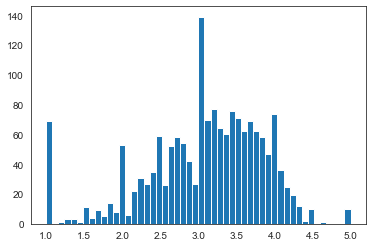

In [152]:
plt.hist(ratings,bins = 50)

(array([601., 198., 123., 120.,  83.,  77.,  60.,  49.,  37.,  30.,  44.,
         22.,  21.,  23.,  26.,  19.,  13.,  12.,  17.,   8.,  10.,  10.,
          7.,   6.,   4.,  13.,   1.,   5.,   2.,   3.,   0.,   2.,   3.,
          3.,   0.,   2.,   2.,   0.,   1.,   0.,   1.,   2.,   0.,   3.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.  ,  12.66,  24.32,  35.98,  47.64,  59.3 ,  70.96,  82.62,
         94.28, 105.94, 117.6 , 129.26, 140.92, 152.58, 164.24, 175.9 ,
        187.56, 199.22, 210.88, 222.54, 234.2 , 245.86, 257.52, 269.18,
        280.84, 292.5 , 304.16, 315.82, 327.48, 339.14, 350.8 , 362.46,
        374.12, 385.78, 397.44, 409.1 , 420.76, 432.42, 444.08, 455.74,
        467.4 , 479.06, 490.72, 502.38, 514.04, 525.7 , 537.36, 549.02,
        560.68, 572.34, 584.  ]),
 <a list of 50 Patch objects>)

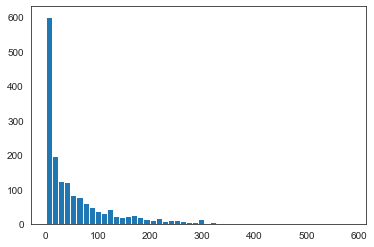

In [153]:
plt.hist(no_of_ratings, bins = 50)

In [105]:
target = pd.DataFrame(df.groupby('Title')['Rating'].mean())

In [97]:
target = pd.DataFrame(ratings)

In [107]:
target['No of ratings'] = no_of_ratings

In [108]:
target.head()

,Rating,No of ratings
Title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [155]:
moviemat = df.pivot_table(index='User_ID',columns='Title',values='Rating')

In [156]:
moviemat.head()

Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_ID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
target.sort_values('No of ratings',ascending=False).head(10)

,Rating,No of ratings
Title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [160]:
starwars_user_ratings = moviemat['Star Wars (1977)']
starwars_user_ratings.head()

User_ID
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [161]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [162]:
similar_to_starwars 

Title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [164]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
Title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [165]:
corr_starwars['no of ratings'] = no_of_ratings

In [180]:
corr_starwars = corr_starwars.sort_values(['Correlation'], ascending = False)

In [181]:
corr_starwars.head(10)

,Correlation,no of ratings
Title,,
Hollow Reed (1996),1.0,6
Cosi (1996),1.0,4
Stripes (1981),1.0,5
No Escape (1994),1.0,5
Man of the Year (1995),1.0,9
Commandments (1997),1.0,3
"Line King: Al Hirschfeld, The (1996)",1.0,2
Ed's Next Move (1996),1.0,3
"Good Man in Africa, A (1994)",1.0,2


In [185]:
corr_starwars[corr_starwars['no of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,no of ratings
Title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
